In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
wine_df=pd.read_csv('winequality-red.csv')

In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#The quality of wine 3 to 8
#if 3 4 5 = low
#if 6 7 8 = high

In [6]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
print(wine_df["quality"].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


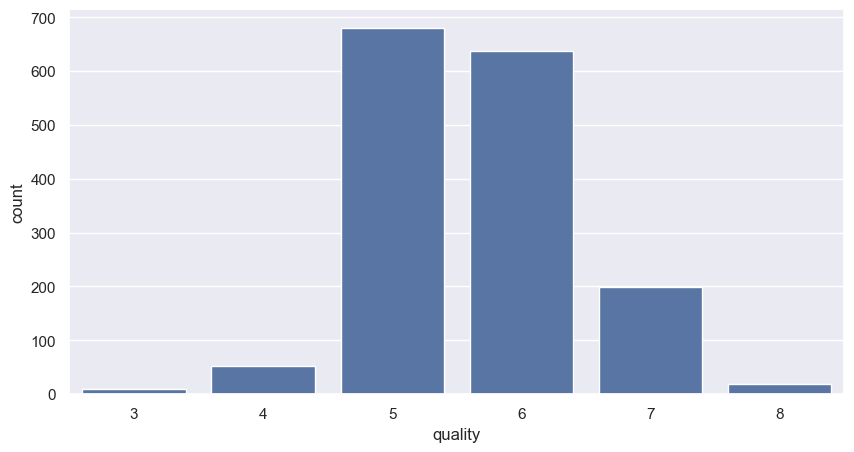

In [23]:
fig=plt.figure(figsize=(10, 5))
sns.countplot(x='quality',data=wine_df)
plt.show()

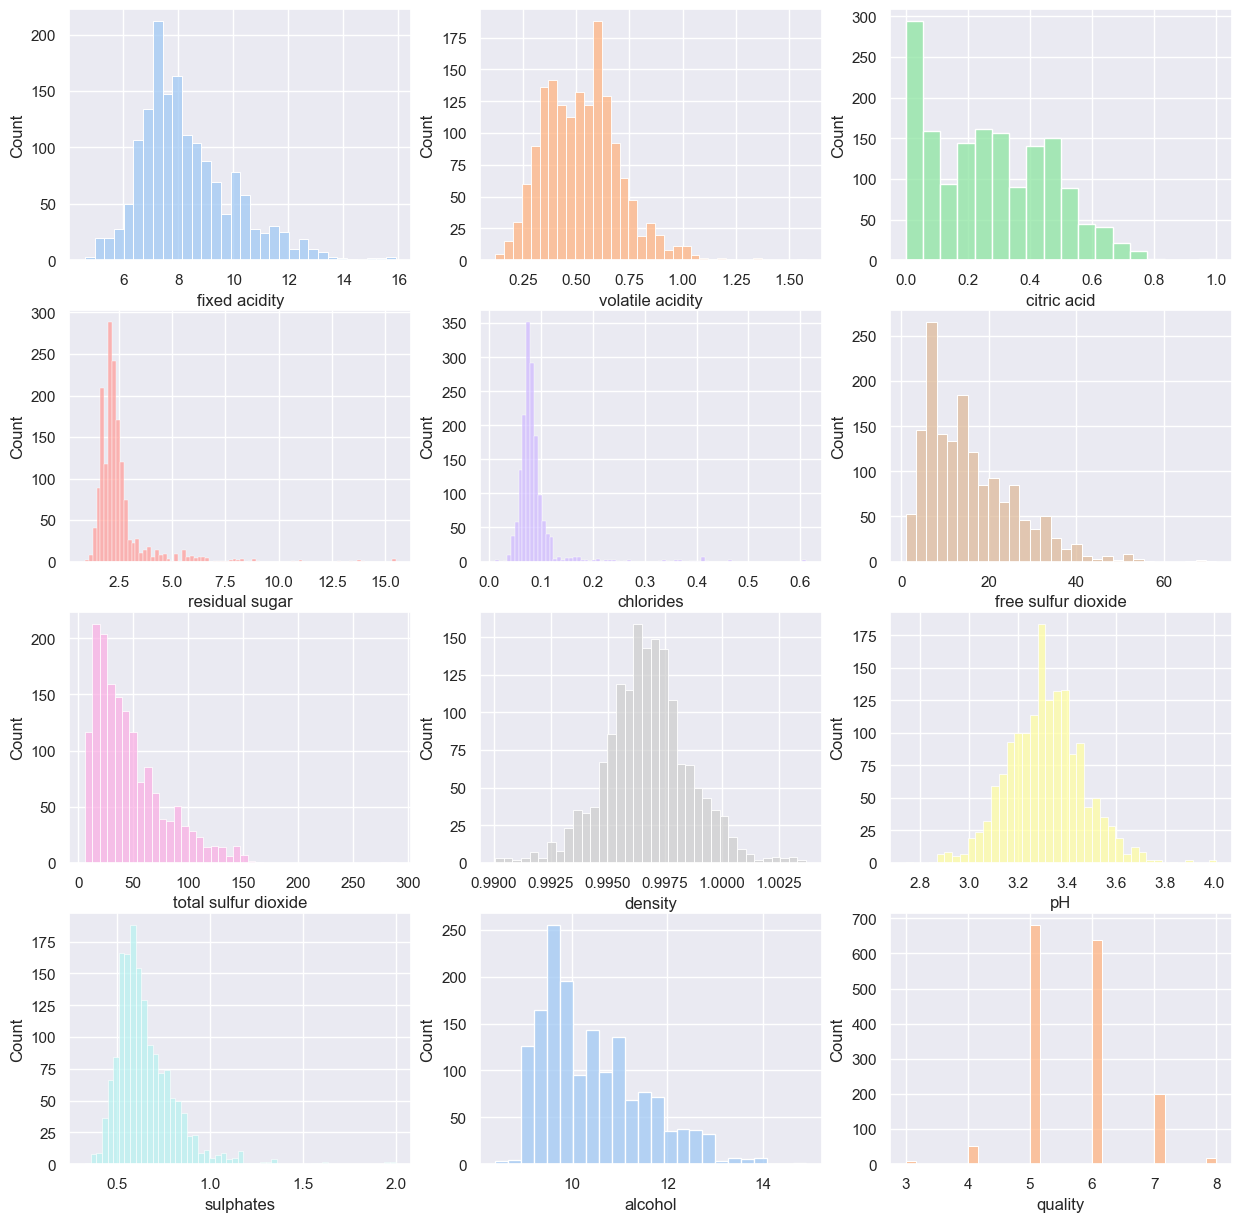

In [26]:
# Visualize the distribution of all features

sns.set(style="darkgrid")
colors=sns.color_palette("pastel", len(columns))

fig,ax1=plt.subplots(4,3,figsize=(15,15))
k=0

columns=list(wine_df.columns)
for i in range(4):
    for j in range(3):
        if k < len(columns):
            sns.histplot(wine_df[columns[k]],ax=ax1[i][j],color=colors[k])
            k+=1

plt.show()

In [16]:
def log_transform(column):
    return np.log1p(column [0])

wine_df['residual_sugar'] = wine_df[['residual sugar']].apply(log_transform, axis=1)
wine_df['chlorides'] = wine_df[['chlorides']].apply(log_transform, axis=1)
wine_df['free_sulfur_dioxide'] = wine_df[['free sulfur dioxide']].apply(log_transform, axis=1)
wine_df['total_sulfur_dioxide'] = wine_df[['total sulfur dioxide']].apply(log_transform, axis=1)
wine_df['sulphates'] = wine_df[['sulphates']].apply(log_transform, axis=1)

C:\Users\Priya\AppData\Local\Temp\ipykernel_22740\2333570019.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(column [0])
C:\Users\Priya\AppData\Local\Temp\ipykernel_22740\2333570019.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(column [0])
C:\Users\Priya\AppData\Local\Temp\ipykernel_22740\2333570019.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(column [0])
C:\Users\Priy

In [27]:
wine_df.corr().sort_values(by='quality',ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,0.124052,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.185100,-0.174919,-0.057731,0.251397,0.476166,1.000000
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000,0.476166
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919


In [17]:
x=wine_df.drop('quality',axis=1)
y=wine_df['quality']

In [18]:
# Data balancing using SMOTE
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=5)
x,y=oversample.fit_resample(x,y)

In [19]:
#classify function
from sklearn.model_selection import train_test_split,cross_val_score

def classify(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
    model.fit(x_train,y_train)

    return model.score(x_test,y_test)*100

In [20]:
#logistic regression
from sklearn.linear_model import LogisticRegression

lm_lr=LogisticRegression()
accuracy_lr=classify(lm_lr,x,y)
print(" logistic accuracy:{:<0.2f}".format(accuracy_lr))

 logistic accuracy:47.09


C:\Users\Priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
accuracy_dtc=classify(model,x,y)
print("DecisionTreeClassifier accuracy:{:<0.2f}",format(accuracy_dtc))

DecisionTreeClassifier accuracy:{:<0.2f} 77.43119266055047


In [21]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
accuracy_rfc=classify(model,x,y)
print("RandomForestClassifier{:<0.2f}",format(accuracy_rfc))

RandomForestClassifier{:<0.2f} 85.07645259938838


C:\Users\Priya\AppData\Local\Temp\ipykernel_18300\4209271304.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='pastel')


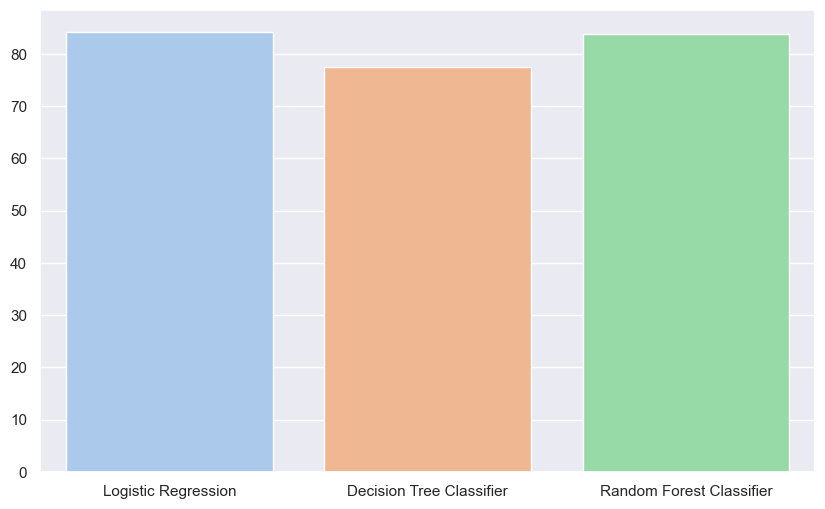

In [58]:

#ploting the accuraciesof different models
models = ['Logistic Regression' , 'Decision Tree Classifier' , 'Random Forest Classifier']
accuracy = [accuracy_lr , accuracy_dtc , accuracy_rfc]
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracy, palette='pastel')
plt.show()

In [63]:
#create pickle file
import pickle
with open('wine_quality_model.pkl','wb') as f:
        print("Model saved to wine_quality_model.pkl successfully.")

Model saved to wine_quality_model.pkl successfully.
